# STATS 765 Project Milestone 2 -- Car Crash
Neil He qhe497

## 1. Goal

The main idea for our project is to find out what are the key factors that cause car crashes in New Zealand and what cause the different level of crashes.

## 2. Data Source 

We get all the data we need from the NZ Transport Agency Open Data Port. On the website, we can find out that five results show up. We only need the Crash Analysis System(CAS) to do the rest of our task. The data can be downloaded as CSV, KML, Shapefile, and GeoJSON format, but we need a CSV file that will be good to go. The file we got is named Crash_Analysis_System_(CAS)_data.csv, which is a terrible name for programming. Thus, we change it to crash_data.csv.<br>

As a result, we have 72 attributes in the dataset, and we will not use all of them. Thus, we decide to drop some of those, and some contain missing values. If those columns are not necessary or related to our goal, we will settle them, but on the other hand, if columns are going to affect our result and contain missing values, we need to fill them.<br>

All the data we retrieved in Appendix 1.1



## 3.Data Processing

The mean idea is to choose those columns that we only need to use for analysis. Here we can see after tidying the dataset. We only have 13 essential attributes left. Here is a quick view of the dataset I modified and named as df2. The full code will be in Appendix 1.2

In [49]:
head(df2)

OBJECTID,crashDirectionDescription,crashLocation1,crashLocation2,crashSeverity,minorInjuryCount,crashYear,directionRoleDescription,light,region,speedLimit,roadLane,weatherA
1,Null,EAST ST,ELLIOT ST,Non-Injury Crash,0,2007,North,Dark,Auckland Region,50,2-way,Fine
3,Null,SH 2,SH 26,Non-Injury Crash,0,2003,North,Dark,Waikato Region,50,2-way,Fine
4,West,CHURCH ST,HUGO JOHNSTON DRIVE,Non-Injury Crash,0,2010,East,Bright sun,Auckland Region,50,2-way,Fine
6,Null,THE AVENUE,ACCESSWAY,Minor Crash,1,2017,North,Overcast,Auckland Region,50,2-way,Light rain
7,Null,PENROSE INT,GT SOUTH LINK,Non-Injury Crash,0,2018,North,Overcast,Auckland Region,50,1-way,Fine
9,North,KNIGHTON ROAD,HELENA ROAD,Minor Crash,1,2010,South,Overcast,Waikato Region,50,2-way,Fine


In [53]:
length(names(df2)) # number of attributes in the modified dataset
length(names(df)) # number of attributes in the orignial dataset

[1] 13

[1] 72

Here we got the dataset we need for the next step. However, there is still some missing value in it. Thus, we need to find a way to impute them. And this is how its looks like. For the region, we can't do anything more, so we just use filter to select those not equal to NA.

In [106]:
colSums(is.na(df2))

OBJECTID crashDirectionDescription            crashLocation1 
                        0                         0                         0 
           crashLocation2             crashSeverity          minorInjuryCount 
                      921                         0                       136 
                crashYear  directionRoleDescription                     light 
                        0                        79                         0 
                   region                speedLimit                  roadLane 
                     3026                       555                         0 
                 weatherA 
                        0

After we did some further investigation, we found out that for the missing value in crash location 2, most of them are off the road, but I think we still need to include them. Thus, I use 0 to impute them. We may need to encode all the attributes for modeling in the future, so 0 should be fine.<br>

For the minorInjuryCount, we assume NA equal to 0, so we use 0 to impute them. <br>

For the directionRoleDescription, I believe is the same as crashLocation2, thus 0 as well. <br>

For the speed Limit, I used mean value to do the imputation, which wouldn't effect lots to the result.<br>

Here is the final colSum. All the process can be found in Appendix 1.3 and 1.4

In [107]:
colSums(is.na(df3))

OBJECTID crashDirectionDescription            crashLocation1 
                        0                         0                         0 
           crashLocation2             crashSeverity          minorInjuryCount 
                        0                         0                         0 
                crashYear  directionRoleDescription                     light 
                        0                         0                         0 
                   region                speedLimit                  roadLane 
                        0                         0                         0 
                 weatherA 
                        0

## 4 Data Exploration

This table shows the different types of crashes in all of New Zealand. And we also showed, with different region how is the crashes distributed.

In [108]:
table(df3$crashSeverity)


     Fatal Crash      Minor Crash Non-Injury Crash    Serious Crash 
            7101           178417           544570            43764 

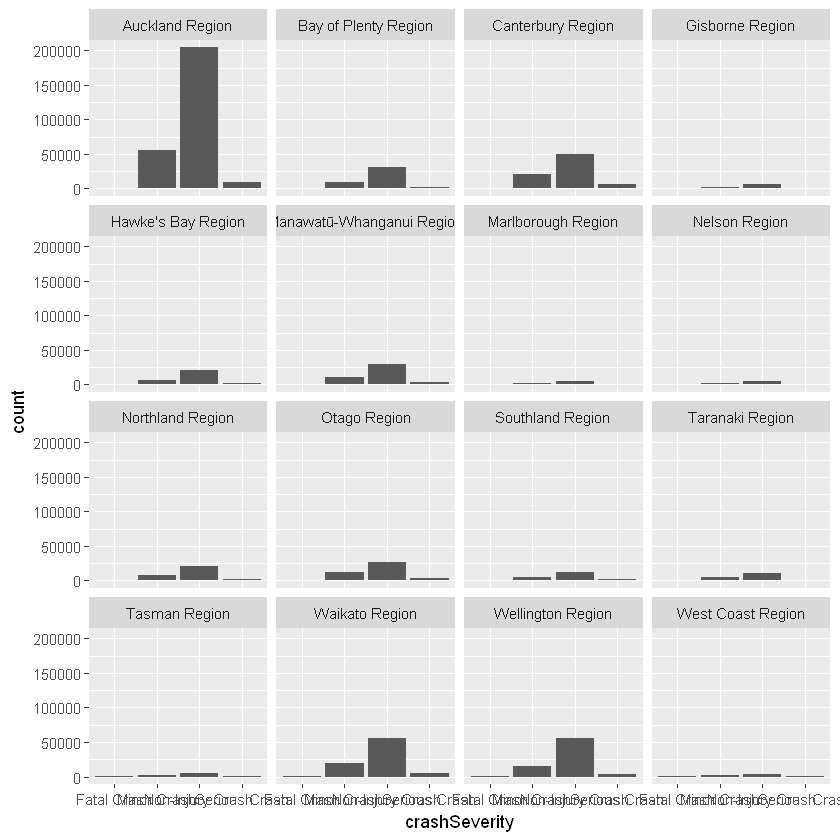

In [120]:
ggplot(df3,aes(x=crashSeverity, group = region)) + geom_bar() +  facet_wrap(~region)

We also want to find out how the sun light effect the result

In [19]:
knitr::kable(table(df3$light))



|Var1       |   Freq|
|:----------|------:|
|Bright sun | 287702|
|Dark       | 211188|
|Overcast   | 233010|
|Twilight   |  36116|
|Unknown    |   5836|

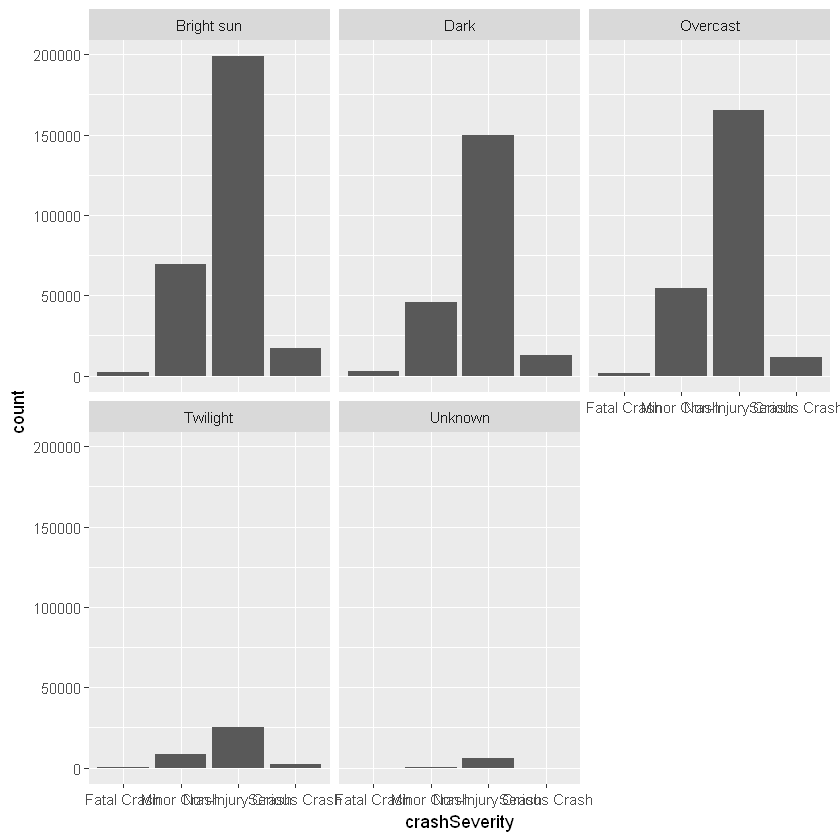

In [20]:
ggplot(df3,aes(x=crashSeverity, group = region)) + geom_bar() +  facet_wrap(~light)

We also want to find out how the weather effect the result

In [25]:
knitr::kable(table(df3$weatherA))



|Var1          |   Freq|
|:-------------|------:|
|Fine          | 600355|
|Hail or Sleet |     89|
|Heavy rain    |  31223|
|Light rain    | 116889|
|Mist or Fog   |  10568|
|Null          |  13223|
|Snow          |   1505|

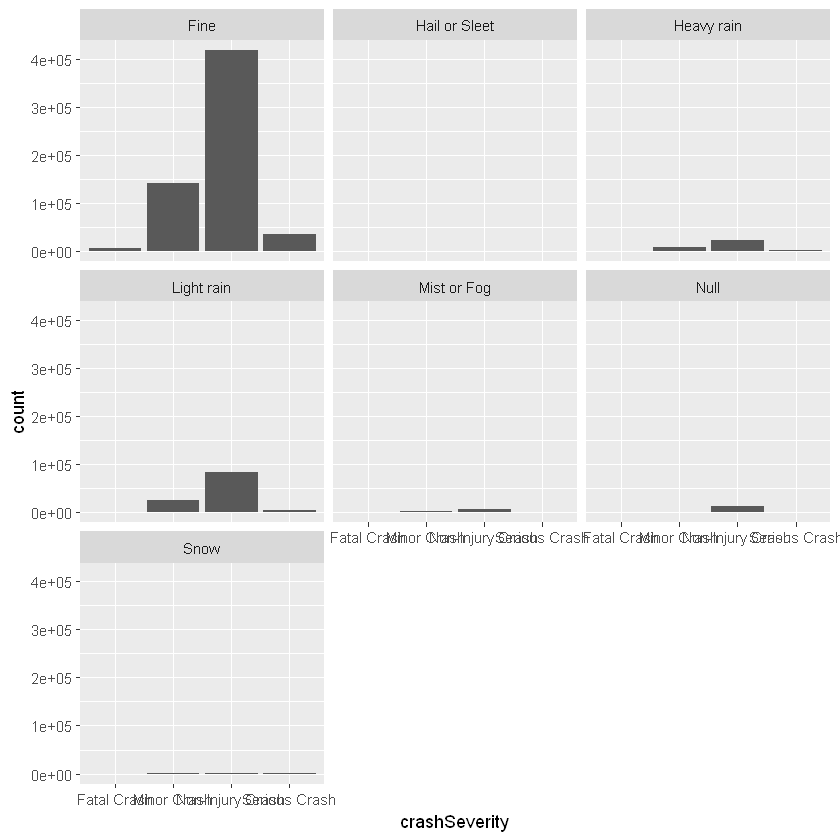

In [24]:
ggplot(df3,aes(x=crashSeverity, group = region)) + geom_bar() +  facet_wrap(~weatherA)

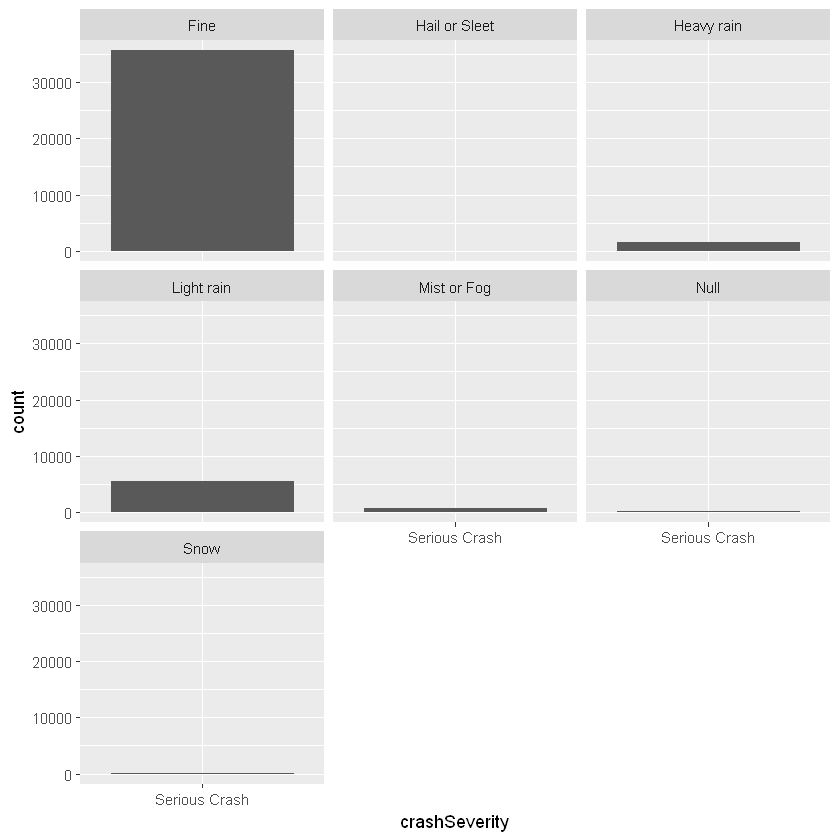

In [31]:
df3 %>% filter(crashSeverity == 'Serious Crash') %>% ggplot(aes(x = crashSeverity))+ geom_bar() +  facet_wrap(~weatherA)

## 5. Analytical Plan

The next step is to apply analytical methods, in other words, models. We have learned the linear regression model. I think some of the concepts will fit our goal. For example, suppose we want to count the total number of crashes based on something. We can use linear regression to determine which attributes contribute the most by the backward or o forward stepwise method. <br>

On the other hand, in our case, finding out which attributes contribute the most to car crashes is a classification problem, and we may build a tree model or neural model to find out the result. <br>

In the end, we can use the cross-validation method to compare different models and find out the best one.


## Appendix

### 1.1

In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
df <- read_csv('crash data.csv')
head(df)


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  crashDirectionDescription = col_character(),
  crashFinancialYear = col_character(),
  crashLocation1 = col_character(),
  crashLocation2 = col_character(),
  crashRoadSideRoad = col_logical(),
  crashSeverity = col_character(),
  crashSHDescription = col_character(),
  directionRoleDescription = col_character(),
  flatHill = col_character(),
  holiday = col_character(),
  intersection = col_logical(),
  light = col_character(),
  region = col_character(),
  roadCharacter = col_character(),
  roadLane = col_character(),
  roadSurface = col_character(),
  streetLight = col_character(),
  tlaName = col_character(),
  trafficControl = col_character(),
  urban = col_character()
  # ... with 2 more columns
)
i Use `spec()` for the full column specifications.




X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
1772561,5896382,1,NA,525420,0,NA,0,1,NA,...,NA,NA,0,0,Urban,0,NA,NA,Fine,Null
1836757,5859311,3,NA,534300,0,NA,0,2,NA,...,NA,NA,0,0,Urban,0,NA,NA,Fine,Frost
1762088,5912507,4,NA,519500,0,NA,0,1,NA,...,NA,NA,0,0,Urban,1,NA,NA,Fine,Null
1753522,5911939,6,NA,518902,0,NA,0,2,NA,...,NA,NA,0,0,Urban,0,NA,NA,Light rain,Null
1761364,5914259,7,NA,520202,0,NA,0,2,NA,...,NA,NA,0,0,Urban,0,NA,NA,Fine,Null
1803464,5815043,9,NA,530500,0,NA,0,3,NA,...,NA,NA,0,0,Urban,0,NA,NA,Fine,Null


In [3]:
length(names(df))

[1] 72

### 1.2

In [4]:
df2 <- select(df,c(OBJECTID, 
                   urban,
                   crashYear,
                   directionRoleDescription,
                   light,
                   region,
                   speedLimit,
                   roadLane,
                   roadSurface,
                   weatherA,
                   crashSeverity
))


In [5]:
head(df2)

OBJECTID,urban,crashYear,directionRoleDescription,light,region,speedLimit,roadLane,roadSurface,weatherA,crashSeverity
1,Urban,2007,North,Dark,Auckland Region,50,2-way,Sealed,Fine,Non-Injury Crash
3,Urban,2003,North,Dark,Waikato Region,50,2-way,Sealed,Fine,Non-Injury Crash
4,Urban,2010,East,Bright sun,Auckland Region,50,2-way,Sealed,Fine,Non-Injury Crash
6,Urban,2017,North,Overcast,Auckland Region,50,2-way,Sealed,Light rain,Minor Crash
7,Urban,2018,North,Overcast,Auckland Region,50,1-way,Sealed,Fine,Non-Injury Crash
9,Urban,2010,South,Overcast,Waikato Region,50,2-way,Sealed,Fine,Minor Crash


In [6]:
    colSums(is.na(df2))

OBJECTID                    urban                crashYear 
                       0                        0                        0 
directionRoleDescription                    light                   region 
                      79                        0                     3026 
              speedLimit                 roadLane              roadSurface 
                     555                        0                        0 
                weatherA            crashSeverity 
                       0                        0

In [9]:
head(df2)

OBJECTID,crashDirectionDescription,crashLocation1,crashLocation2,crashSeverity,minorInjuryCount,crashYear,directionRoleDescription,light,region,speedLimit,roadLane,weatherA
1,Null,EAST ST,ELLIOT ST,Non-Injury Crash,0,2007,North,Dark,Auckland Region,50,2-way,Fine
3,Null,SH 2,SH 26,Non-Injury Crash,0,2003,North,Dark,Waikato Region,50,2-way,Fine
4,West,CHURCH ST,HUGO JOHNSTON DRIVE,Non-Injury Crash,0,2010,East,Bright sun,Auckland Region,50,2-way,Fine
6,Null,THE AVENUE,ACCESSWAY,Minor Crash,1,2017,North,Overcast,Auckland Region,50,2-way,Light rain
7,Null,PENROSE INT,GT SOUTH LINK,Non-Injury Crash,0,2018,North,Overcast,Auckland Region,50,1-way,Fine
9,North,KNIGHTON ROAD,HELENA ROAD,Minor Crash,1,2010,South,Overcast,Waikato Region,50,2-way,Fine


### 1.3

In [10]:
df3 <- filter(df2,!is.na(region)) # Handle the missing region
head(df3)

OBJECTID,crashDirectionDescription,crashLocation1,crashLocation2,crashSeverity,minorInjuryCount,crashYear,directionRoleDescription,light,region,speedLimit,roadLane,weatherA
1,Null,EAST ST,ELLIOT ST,Non-Injury Crash,0,2007,North,Dark,Auckland Region,50,2-way,Fine
3,Null,SH 2,SH 26,Non-Injury Crash,0,2003,North,Dark,Waikato Region,50,2-way,Fine
4,West,CHURCH ST,HUGO JOHNSTON DRIVE,Non-Injury Crash,0,2010,East,Bright sun,Auckland Region,50,2-way,Fine
6,Null,THE AVENUE,ACCESSWAY,Minor Crash,1,2017,North,Overcast,Auckland Region,50,2-way,Light rain
7,Null,PENROSE INT,GT SOUTH LINK,Non-Injury Crash,0,2018,North,Overcast,Auckland Region,50,1-way,Fine
9,North,KNIGHTON ROAD,HELENA ROAD,Minor Crash,1,2010,South,Overcast,Waikato Region,50,2-way,Fine


In [11]:
colSums(is.na(df3))

OBJECTID crashDirectionDescription            crashLocation1 
                        0                         0                         0 
           crashLocation2             crashSeverity          minorInjuryCount 
                      892                         0                       136 
                crashYear  directionRoleDescription                     light 
                        0                        79                         0 
                   region                speedLimit                  roadLane 
                        0                       541                         0 
                 weatherA 
                        0

### 1.4

In [12]:
df_missing_crash2 <- filter(df3,is.na(crashLocation2))
head(df_missing_crash2)
# Check All the crash location 2 are NA
# The Conclusion is basically all the NA crash Location 2 are Offroad area, thus we maybe can fill this with NULL.

OBJECTID,crashDirectionDescription,crashLocation1,crashLocation2,crashSeverity,minorInjuryCount,crashYear,directionRoleDescription,light,region,speedLimit,roadLane,weatherA
898,Null,OFFROAD CARPARK,NA,Minor Crash,1,2020,South,Bright sun,Wellington Region,50,Off road,Fine
1559,Null,"HAMILTON ROAD, CAMBRIDGE, WAIPA DISTRICT",NA,Minor Crash,1,2019,East,Dark,Waikato Region,50,2-way,Fine
2485,Null,Z CARPARK NORTHWOOD SUPA CENTRE,NA,Minor Crash,1,2019,West,Bright sun,Canterbury Region,20,Off road,Fine
2544,Null,OFF ROAD - RESENE CARPARK,NA,Minor Crash,1,2020,East,Bright sun,Auckland Region,NA,Off road,Fine
3497,Null,OFF ROAD,NA,Minor Crash,1,2019,South,Overcast,Manawatu-Whanganui Region,50,Off road,Fine
3772,Null,OFF ROAD - KAWHIA BEACH,NA,Serious Crash,0,2020,Null,Overcast,Waikato Region,NA,Off road,Fine


In [13]:
df3$minorInjuryCount[is.na(df3$minorInjuryCount)]<-0 # Handle Missing Value for minorInjuryCount

In [14]:
df3$speedLimit[is.na(df3$speedLimit)]<-mean(df3$speedLimit, na.rm=T)  # Handle Missing Value for speedLimit

In [15]:
df3$directionRoleDescription[is.na(df3$directionRoleDescription)]<-0 # Handle Missing Value for directionRoleDescription

In [16]:
df3$crashLocation2[is.na(df3$crashLocation2)]<-0 # Handle Missing Value for crashLocation2

In [17]:
colSums(is.na(df3)) # No missing value in dataset

OBJECTID crashDirectionDescription            crashLocation1 
                        0                         0                         0 
           crashLocation2             crashSeverity          minorInjuryCount 
                        0                         0                         0 
                crashYear  directionRoleDescription                     light 
                        0                         0                         0 
                   region                speedLimit                  roadLane 
                        0                         0                         0 
                 weatherA 
                        0

In [18]:
library(ggplot2)